# Linear regression with sklearn

In this notebook we demonstrate some of sklearn functionality to perform linear regression.
To illustrate how to use sklearn linear regression tools we generate 2 synthetic datasets.
Here we cover linear regression, polynomial regression, ridge regularization and show the way to visualize the 
datasets and regression output.
The notebook is based on the Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron 2019, https://github.com/ageron/handson-ml2


In [115]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt, matplotlib as mpl
from sklearn.model_selection import train_test_split

# To plot pretty figures
COLOR = 'yellow'
mpl.rcParams['text.color'] = mpl.rcParams['axes.labelcolor'] = mpl.rcParams['xtick.color'] = mpl.rcParams['ytick.color'] = COLOR
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

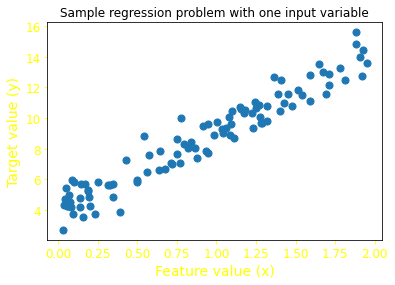

In [113]:
# Let's generate synthetic dataset for simple regression and visualize it.

plt.figure()
plt.title('Sample regression problem with one input variable')

X = 2 * np.random.rand(100, 1)
y = 4 + 5 * X + np.random.randn(100, 1)
plt.scatter(X, y, marker= 'o', s=50)
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Linear regression

Let's now perform linear regression and check its accuracy.

In [68]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {}'.format(linreg.intercept_))
print('R-squared score (training): {}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [[4.94381415]]
linear model intercept (b): [3.97799376]
R-squared score (training): 0.8862268824473422
R-squared score (test): 0.9077065009799767


### Linear regression: example plot 

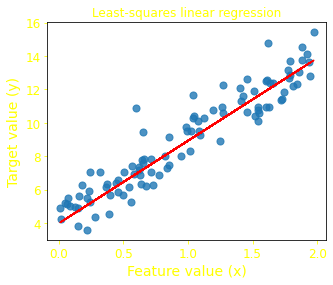

In [96]:
plt.figure(figsize=(5,4))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Polynomial regression

We generate synthetic dataset to demonstrate polynomial regression.
In this case our data is more complex than a simple straight line.
One can still use a linear model to fit nonlinear data using technique called Polynomial Regression.
We add powers of each feature as new features, then train a linear model on this extended set of features. 



First, we generate some nonlinear data based on quadratic equation plus some noise.

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


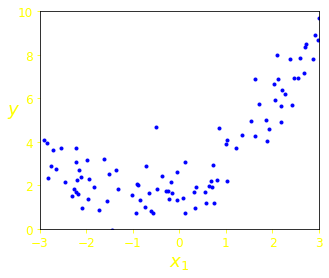

In [132]:
plt.figure(figsize=(5,4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

We use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):


In [133]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_poly now contains the original feature of X plus the square of this feature. 
Now we can fit a LinearRegression model to this extended training data

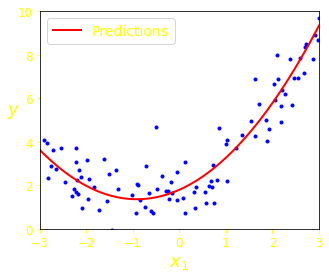

In [134]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure(figsize=(5,4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# Regularized models

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to
\begin{equation*}
\ α \sum_{k=1}^n w_k^2
\end{equation*}    is added to the cost function, where \begin{equation*} w_k \end{equation*} is a feature weight.

This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

The hyperparameter α controls how much you want to regularize the model. If α = 0 then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

In [137]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [138]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[1.55071465]])

Let's display several Ridge models trained on our synthetic data using different α value.

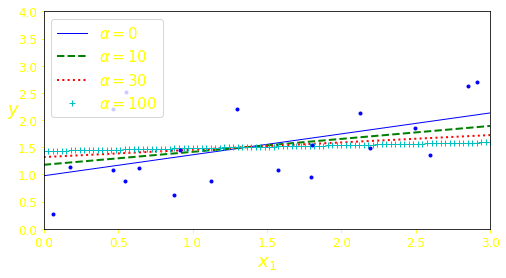

In [139]:
from sklearn.linear_model import Ridge

def plot_model(model_class,  alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:", "c+")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plot_model(Ridge,  alphas=(0, 10, 30, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()